# ETAPA EXPLORACIÓN DE DATOS:

A continuación, se realiza un análisis exploratorio de los datos con el objetivo de comprender la distribución, características y relaciones de las variables incluidas en el dataset consolidado. Este paso es fundamental para identificar patrones, detectar posibles inconsistencias, y evaluar la calidad de la información previa a la aplicación de modelos predictivos.

El análisis incluye la evaluación de estadísticas descriptivas, la identificación de valores atípicos y la visualización de la distribución de variables numéricas y categóricas. Además, se examinan correlaciones entre variables para anticipar posibles influencias y dependencias relevantes en el contexto del estudio.

Este proceso proporciona una base sólida para la toma de decisiones informadas respecto a la selección de variables, técnicas de modelado y estrategias de validación, asegurando la robustez y validez de los resultados obtenidos.

OBJETIVOS:

1.Describir la distribución de variables clave

2.Detectar posibles desequilibrios (ej. clase objetivo, sexo)

3.Observar asociaciones preliminares (ej. cobertura vs riesgo)

4.Guiar decisiones para el modelo posterior



Estadísticas descriptivas variables numéricas:
               edad  n_internaciones  dias_estada_avg  n_diagnosticos  \
count  10255.000000      10255.00000     10255.000000    10255.000000   
mean      21.805363          2.21765         1.987767       29.389761   
std        4.950915          4.42668         3.152107       33.460073   
min       12.000000          1.00000         1.000000        0.000000   
25%       18.000000          2.00000         1.500000       13.000000   
50%       22.000000          2.00000         1.500000       21.000000   
75%       26.000000          2.00000         1.500000       33.000000   
max       29.000000        253.00000       101.000000      733.000000   

       refiere_ansiedad  refiere_estres  refiere_insomnio  riesgo_suicida  
count      10255.000000    10255.000000      10255.000000    10255.000000  
mean           0.169868        0.067869          0.043784        0.085032  
std            0.375535        0.251534          0.204623        0.

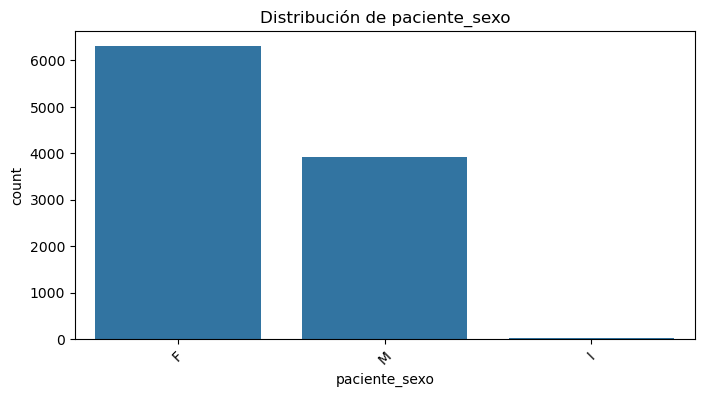


Distribución de 'cobertura_cat':
cobertura_cat
SIN COBERTURA          0.577474
OBRA SOCIAL ESTATAL    0.260848
OBRA SOCIAL PAGA       0.161677
Name: proportion, dtype: float64


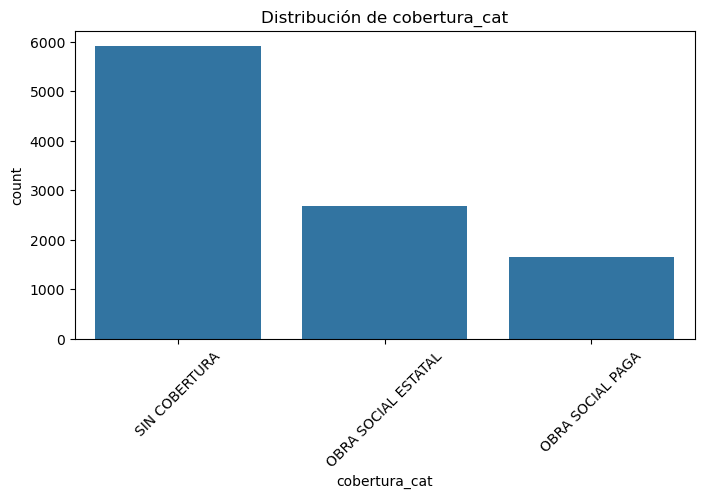


Distribución de 'tipo_egreso_mas_frecuente':
tipo_egreso_mas_frecuente
EGRESO POR ORDEN MEDICA        0.847977
ALTA                           0.141589
ALTA VOLUNTARIA                0.006046
FUGA                           0.001658
TRASLADO                       0.001170
REMISION A OTRA INSTITUCION    0.000878
EGRESO POR DEFUNCION           0.000488
DEFUNCION                      0.000195
Name: proportion, dtype: float64


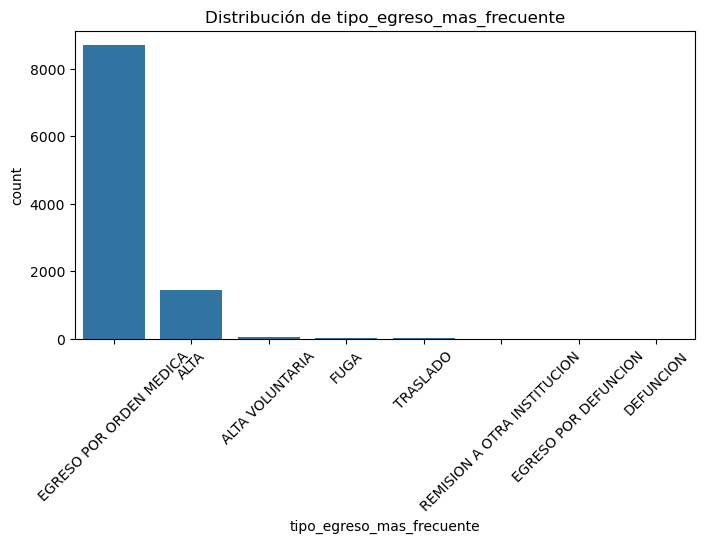


Distribución de 'centro_atencion_mas_frecuente':
centro_atencion_mas_frecuente
HRRG                                              0.510678
HOSPITAL REGIONAL DE USHUAIA                      0.203218
C.A.T                                             0.063774
CAPS 8                                            0.024963
CAPS 3                                            0.020575
CAPS 1                                            0.019308
CAPS 6                                            0.017747
CAPS 2                                            0.016090
CAPS 3 - RG                                       0.014139
CAPS 9                                            0.013652
CAPS 5                                            0.012872
CAPS 7                                            0.009556
CAPS 4                                            0.008679
CAPS 1 - RG                                       0.008581
CAPS 5 - RG                                       0.007996
CENTRO PROVINCIAL DE SALUD INFANTO 

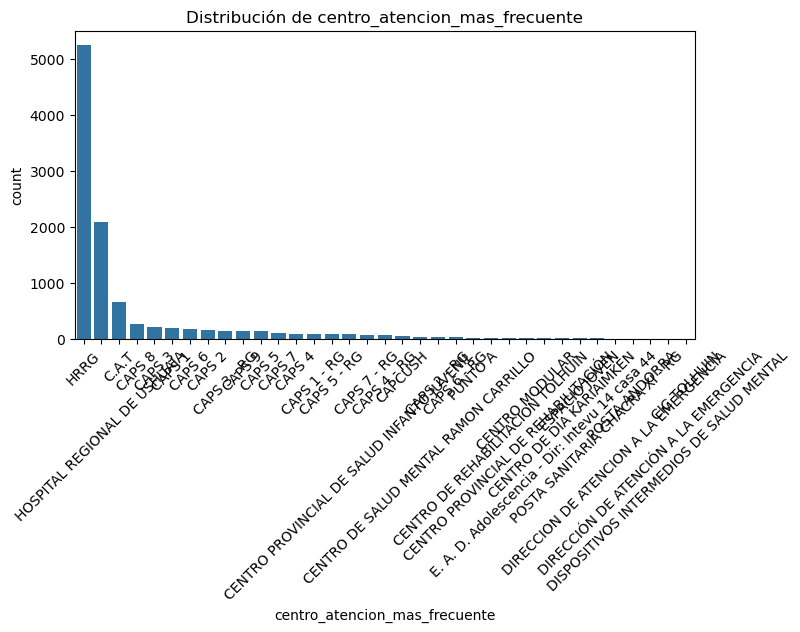

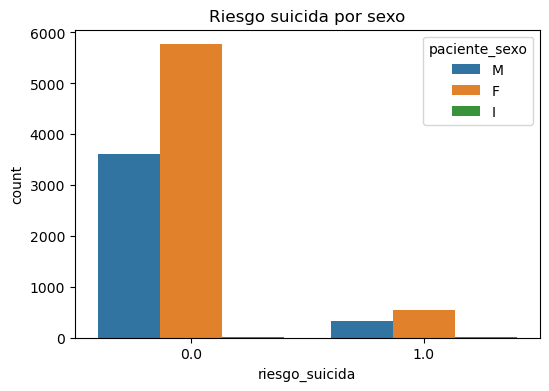

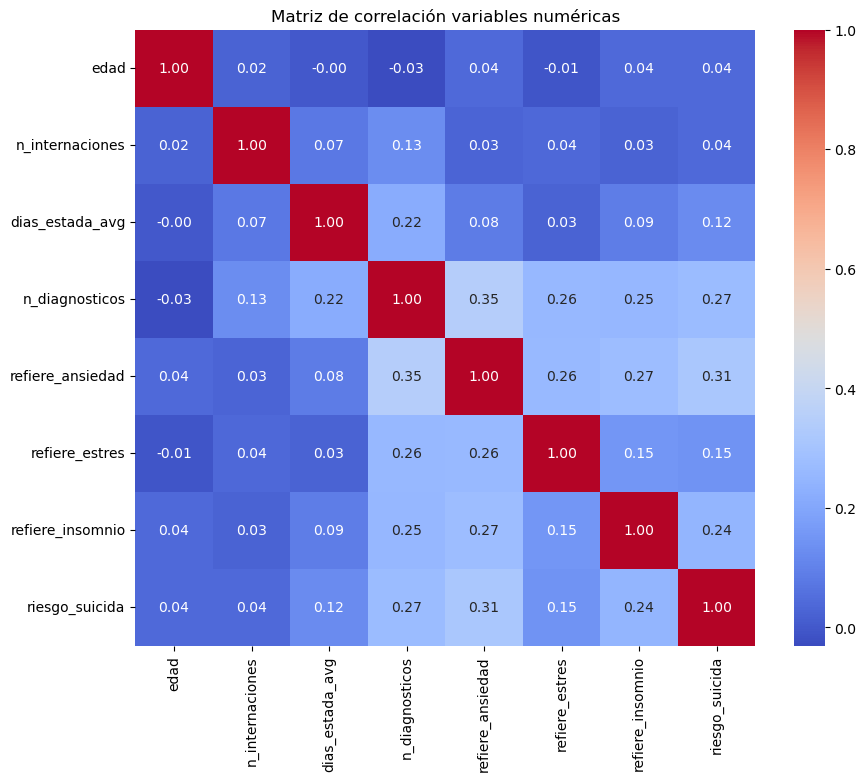


Tabla de contingencia: cobertura vs riesgo_suicida
riesgo_suicida            0.0       1.0
cobertura_cat                          
OBRA SOCIAL ESTATAL  0.903551  0.096449
OBRA SOCIAL PAGA     0.880579  0.119421
SIN COBERTURA        0.929753  0.070247


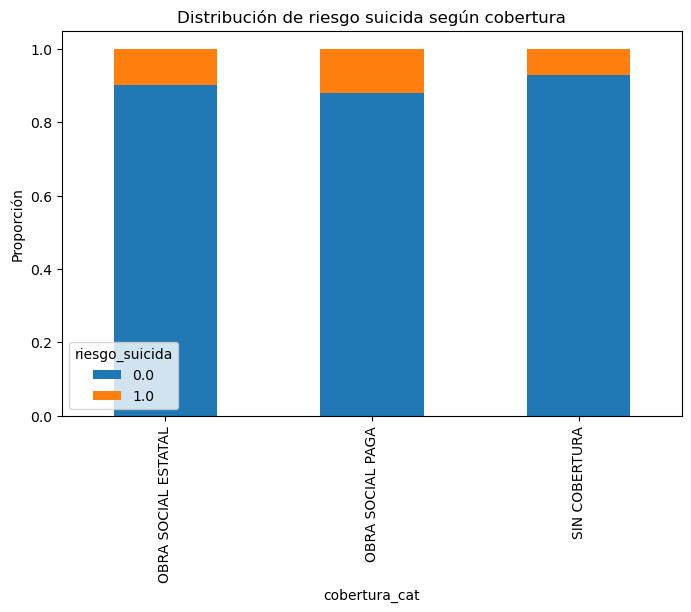

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_final = pd.read_csv('../data/processed/pacientes_processed.csv')

# 1. Estadísticas descriptivas de variables numéricas clave
vars_numericas = ["edad", "n_internaciones", "dias_estada_avg", "n_diagnosticos", 
                 "refiere_ansiedad", "refiere_estres", "refiere_insomnio", "riesgo_suicida"]
print("Estadísticas descriptivas variables numéricas:")
print(df_final[vars_numericas].describe())

# 2. Distribución y conteos para variables categóricas clave
vars_categoricas = ["paciente_sexo", "cobertura_cat", "tipo_egreso_mas_frecuente", "centro_atencion_mas_frecuente"]
for var in vars_categoricas:
    print(f"\nDistribución de '{var}':")
    print(df_final[var].value_counts(normalize=True))
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_final, x=var, order=df_final[var].value_counts().index)
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.show()

# 3. Distribución de la variable objetivo riesgo_suicida por sexo
plt.figure(figsize=(6,4))
sns.countplot(data=df_final, x="riesgo_suicida", hue="paciente_sexo")
plt.title("Riesgo suicida por sexo")
plt.show()

# 4. Matriz de correlación para variables numéricas
plt.figure(figsize=(10,8))
corr = df_final[vars_numericas].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación variables numéricas")
plt.show()

# 5. Asociación preliminar cobertura vs riesgo_suicida (tablas de contingencia y gráfico)
contingencia = pd.crosstab(df_final["cobertura_cat"], df_final["riesgo_suicida"], normalize='index')
print("\nTabla de contingencia: cobertura vs riesgo_suicida")
print(contingencia)

contingencia.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Distribución de riesgo suicida según cobertura")
plt.ylabel("Proporción")
plt.show()


Estadísticas descriptivas de variables numéricas
Se trabajó con una muestra de pacientes jóvenes, con una edad promedio de 21.8 años, dentro del rango que nos interesa (12 a 29 años). Esto valida que la selección de la población objetivo está correctamente enfocada.

Respecto a las internaciones, el promedio es de 2.2 por paciente, pero se observan valores muy altos en algunos casos (hasta 253 internaciones), lo que indica la presencia de pacientes con múltiples hospitalizaciones. Esto genera una distribución sesgada y valores atípicos que deben ser considerados cuidadosamente para evitar que distorsionen los análisis y modelos posteriores.

En cuanto a la duración promedio de las internaciones, ronda los 2 días, aunque con máximos que superan los 100 días, mostrando una amplia variabilidad en la experiencia hospitalaria de los pacientes.

Por último, la cantidad de diagnósticos por paciente presenta un promedio cercano a 29, con una dispersión considerable, lo cual evidencia complejidad clínica variable dentro de la muestra.

En relación a los síntomas autorreferidos, vemos que un 17% de la población declara ansiedad, el 7% estrés y el 4% insomnio, mientras que el riesgo suicida afecta aproximadamente al 8.5% de los pacientes. Esto es un dato relevante para el estudio, pues confirma la necesidad de focalizar en la prevención y detección temprana.

Distribución y características de variables categóricas relevantes
En cuanto a la distribución por sexo, la muestra es mayoritariamente femenina (61.5%), seguida por masculina (38.3%) y una pequeña proporción sin definición clara (0.15%). Esta distribución es relevante para entender la epidemiología del riesgo suicida en el contexto local.

En lo que refiere a la cobertura médica, se observa que más de la mitad de los pacientes (58%) no cuentan con cobertura, mientras que un 26% está afiliado a obra social estatal y un 16% posee obra social paga. Este dato refleja inequidades en el acceso al sistema de salud, que pueden impactar tanto en la atención como en la detección del riesgo.

Sobre el tipo de egreso, el 85% de los pacientes egresó bajo orden médica, con un 14% que obtuvo alta médica. Estos porcentajes nos permiten inferir que la mayoría de las hospitalizaciones finalizan con procedimientos médicos planificados, lo cual puede estar vinculado a la gravedad o al tipo de internación.

Finalmente, el centro de atención predominante es el Hospital Regional Río Grande (HRRG), con más del 50% de los casos, seguido por el Hospital Regional de Ushuaia con alrededor del 20%. Esto indica una concentración geográfica y organizativa que facilita la focalización de políticas o intervenciones.

Relación entre riesgo suicida y variables sociodemográficas
El análisis bivariado muestra que la proporción de pacientes con riesgo suicida varía en función de la cobertura médica: alcanza un 11.9% en quienes cuentan con obra social paga, 9.6% en obra social estatal, y 7% en quienes no tienen cobertura. Este patrón podría reflejar factores socioeconómicos asociados al riesgo, o diferencias en la accesibilidad y calidad de la detección clínica.

Por sexo, la proporción de mujeres en riesgo es superior (9%) a la de hombres (7%), lo cual es coherente con la literatura que señala una mayor prevalencia de ideación suicida y conductas relacionadas en mujeres. No obstante, el riesgo en hombres no debe ser subestimado.

Matriz de correlación entre variables
Se identifican correlaciones moderadas entre la cantidad de diagnósticos y los síntomas autorreferidos: ansiedad (0.35), estrés (0.26) e insomnio (0.25), lo que valida la interrelación clínica entre estos indicadores.

Además, el riesgo suicida presenta correlaciones destacables con ansiedad (0.31) e insomnio (0.24), reafirmando la importancia clínica de estos síntomas para la detección y prevención del riesgo.

Por otro lado, la edad no muestra correlaciones significativas con el riesgo ni con los síntomas dentro del rango analizado, lo que sugiere que la variabilidad en riesgo y síntomas no está directamente influida por la edad en esta población joven.

Conclusiones del análisis exploratorio
En síntesis, el análisis revela que la población estudiada es heterogénea en términos clínicos y sociodemográficos. La alta concentración de pacientes en unos pocos centros y el perfil socioeconómico reflejado en la cobertura médica orientan el diseño de estrategias específicas para el seguimiento y atención.

Los valores atípicos en internaciones y diagnósticos indican la necesidad de un tratamiento cuidadoso para evitar que distorsionen el modelado predictivo.

Las asociaciones preliminares detectadas entre síntomas, diagnósticos, cobertura y riesgo suicida fundamentan la inclusión de estas variables en el modelo, garantizando un enfoque integral y contextualizado.

Con estos resultados, la base está lista para avanzar a la etapa de modelado, con claridad en las variables clave a incluir y los aspectos clínicos y sociales que deben ser priorizados.



Conteo de casos por clase (riesgo_suicida):
riesgo_suicida
0.0    9383
1.0     872
Name: count, dtype: int64


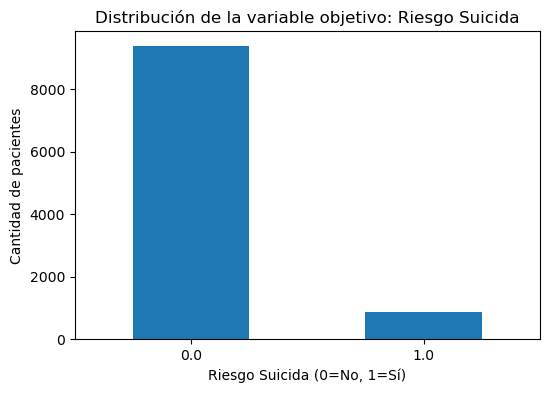

Porcentaje de casos por clase:
riesgo_suicida
0.0    91.496831
1.0     8.503169
Name: proportion, dtype: float64


In [4]:
# Contar valores de la variable objetivo
conteo = df_final['riesgo_suicida'].value_counts()

print("Conteo de casos por clase (riesgo_suicida):")
print(conteo)

# Gráfico de barras para distribución
plt.figure(figsize=(6,4))
conteo.plot(kind='bar')
plt.title('Distribución de la variable objetivo: Riesgo Suicida')
plt.xlabel('Riesgo Suicida (0=No, 1=Sí)')
plt.ylabel('Cantidad de pacientes')
plt.xticks(rotation=0)
plt.show()

print("Porcentaje de casos por clase:")
print(df_final['riesgo_suicida'].value_counts(normalize=True)*100)


Análisis de balance en la variable objetivo

En cuanto a la distribución de la variable objetivo, riesgo_suicida, se observa un marcado desbalance entre las clases. De un total de 10.255 pacientes analizados, 9.383 corresponden a la clase negativa (ausencia de riesgo), mientras que solo 872 presentan riesgo suicida, representando aproximadamente un 8,5% del total.

Esta disparidad es habitual en estudios epidemiológicos y plantea desafíos importantes para el modelado predictivo, ya que los algoritmos tienden a favorecer la clase mayoritaria, lo que puede traducirse en modelos con baja sensibilidad para detectar casos positivos.

Para abordar esta situación, será necesario considerar estrategias específicas, tales como técnicas de sobremuestreo o submuestreo, generación de muestras sintéticas (SMOTE), o el uso de métricas de evaluación adecuadas que ponderen el impacto de ambas clases de manera equilibrada.

El reconocimiento y la adecuada gestión del desbalance contribuirán a construir un modelo robusto y útil en términos prácticos, que maximice la capacidad de detección de riesgo suicida sin sacrificar la precisión general.